In [1]:
import requests
import json
import pandas as pd
from config import nyt_key
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
months = ["3","4","5","6","7"]
year = "2008"

publication_date = []
document_type = []
headline = []
abstract = []
snippet = []
lead_paragraph = []
keyword_1 = []
keyword_2 = []
keyword_3 = []

for month in months:
    base_url = f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?api-key={nyt_key}"
    response = requests.get(base_url).json()["response"]["docs"]
    for i in response:
        if len(i["keywords"]) >= 3:
            publication_date.append(i["pub_date"])
            document_type.append(i["document_type"])
            headline.append(i["headline"]["main"])
            abstract.append(i["abstract"])
            snippet.append(i["snippet"])
            lead_paragraph.append(i["lead_paragraph"])
            keyword_1.append(i["keywords"][0]["value"])
            keyword_2.append(i["keywords"][1]["value"])
            keyword_3.append(i["keywords"][2]["value"])

In [3]:
data = {
    "publication_date":publication_date,
    "document_type":document_type,
    "headline":headline,
    "abstract":abstract,
    "snippet":snippet,
    "lead_paragraph":lead_paragraph,
    "keyword_1":keyword_1,
    "keyword_2":keyword_2,
    "keyword_3":keyword_3,
}

In [4]:
df = pd.DataFrame(data)
print(len(df))
df.head()

31464


,publication_date,document_type,headline,abstract,snippet,lead_paragraph,keyword_1,keyword_2,keyword_3
0,2008-03-03T05:00:00+0000,article,"As Economy Lags in U.S., Oil Nations Rethink Cuts",With high oil prices weighing on a struggling ...,With high oil prices weighing on a struggling ...,With high oil prices weighing on a struggling ...,Commerce Department,International Trade and World Market,Economic Conditions and Trends
1,2008-03-02T05:00:00+0000,article,Crowning Achievements for Two Brother-Architects,George and Edward Blum are known for their Art...,George and Edward Blum are known for their Art...,GEORGE AND EDWARD BLUM are known for their sin...,Manhattan (NYC),Historic Buildings and Sites,ARCHITECTURE
2,2008-03-03T05:00:00+0000,article,Trials of the Saints,The Vatican understands that any canonization ...,The Vatican understands that any canonization ...,"LAST month, while Americans celebrated the fea...",Roman Catholic Church,Beatifications and Canonizations,History
3,2008-03-03T05:00:00+0000,article,Worlds Outfoxed by a Wily Inner Child,"William Steig, the New Yorker cartoonist and i...","William Steig, the New Yorker cartoonist and i...",In the catalog of the terrific exhibition “Fro...,Families and Family Life,"Steig, William",Cartoons and Cartoonists
4,2008-03-01T05:00:00+0000,article,Silver Defends Appointment of a Law Firm Colle...,Both Mr. Silver and the appointee Authur Luxen...,Both Mr. Silver and the appointee Authur Luxen...,"ALBANY  Sheldon Silver, the speaker of the St...",Ethics,"Silver, Sheldon",ALBANY (NY)


In [5]:
# getting total counts of keywords from entire data set including all months
keyword_count_1 = df.keyword_1.value_counts()[0:500]
keyword_count_2 = df.keyword_2.value_counts()[0:500]
keyword_count_3 = df.keyword_3.value_counts()[0:500]

# combine total keyword counts into new dataframe and display top 50 results
combined = pd.concat([keyword_count_1,keyword_count_2,keyword_count_3],axis=1).fillna(0)
combined = combined["keyword_1"] + combined["keyword_2"] + combined["keyword_3"]
top_keywords = combined.sort_values(ascending=False)[0:20]

Text(0.5, 1.0, '2008 Top NYT Keywords (March - July)')

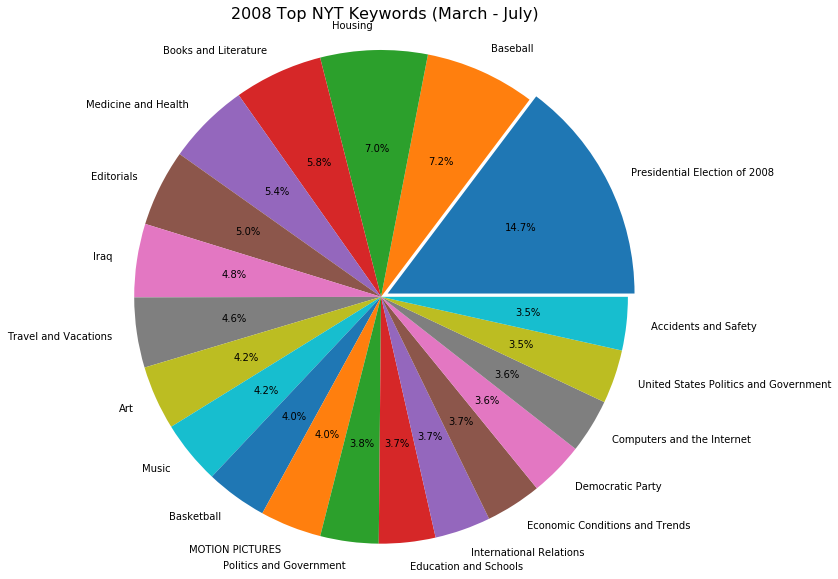

In [6]:
plt.figure(figsize=(13,10))
explode = (.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
plt.pie(top_keywords,explode=explode,labels=top_keywords.index,autopct="%1.1f%%")
plt.axis("equal")
plt.title(f"{year} Top NYT Keywords (March - July)",size=16)
# plt.savefig(f"Output/{year} Top NYT Keywords (March - July).png")

## Evaluating word mentions with the Natural Language Toolkit
* This code tokenizes all headlines, abstracts, lead_paragraphs and keywords into one large string
* All stopwords and words containing puncuation or numbers are dropped from the tokenized data
* The top 1000 words and their counts are displayed in dictionary format

In [7]:
# original dataframe
df = df.drop("snippet",axis=1)
df.head()

,publication_date,document_type,headline,abstract,lead_paragraph,keyword_1,keyword_2,keyword_3
0,2008-03-03T05:00:00+0000,article,"As Economy Lags in U.S., Oil Nations Rethink Cuts",With high oil prices weighing on a struggling ...,With high oil prices weighing on a struggling ...,Commerce Department,International Trade and World Market,Economic Conditions and Trends
1,2008-03-02T05:00:00+0000,article,Crowning Achievements for Two Brother-Architects,George and Edward Blum are known for their Art...,GEORGE AND EDWARD BLUM are known for their sin...,Manhattan (NYC),Historic Buildings and Sites,ARCHITECTURE
2,2008-03-03T05:00:00+0000,article,Trials of the Saints,The Vatican understands that any canonization ...,"LAST month, while Americans celebrated the fea...",Roman Catholic Church,Beatifications and Canonizations,History
3,2008-03-03T05:00:00+0000,article,Worlds Outfoxed by a Wily Inner Child,"William Steig, the New Yorker cartoonist and i...",In the catalog of the terrific exhibition “Fro...,Families and Family Life,"Steig, William",Cartoons and Cartoonists
4,2008-03-01T05:00:00+0000,article,Silver Defends Appointment of a Law Firm Colle...,Both Mr. Silver and the appointee Authur Luxen...,"ALBANY  Sheldon Silver, the speaker of the St...",Ethics,"Silver, Sheldon",ALBANY (NY)


In [8]:
# converting data points into one large string value
all_headline = df['headline'].str.lower().str.cat(sep=' ')
all_abstract = df['abstract'].str.lower().str.cat(sep=' ')
all_lead_paragraph = df['lead_paragraph'].str.lower().str.cat(sep=' ')
all_keywords = df['keyword_1'].str.lower().str.cat(sep=' ') + df['keyword_2'].str.lower().str.cat(sep=' ') + df['keyword_2'].str.lower().str.cat(sep=' ')
all_words = all_headline + all_abstract + all_lead_paragraph + all_keywords
words_count = all_words.split(sep=" ")
print(f"Total number of raw words: {len(words_count):,}")

Total number of raw words: 2,459,901


In [9]:
# natural language toolkit
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# tokenizing the massive string value and filtering out all stopwords, puncuation and numbers
stop_words=set(stopwords.words('english'))
word_tokenize=word_tokenize(all_words)
alpha_word_tokenize=[word for word in word_tokenize if word.isalpha()]
filtered_tokenize=[word for word in alpha_word_tokenize if not word in stop_words]
print(f"Total number of tokenized words after filters applied: {len(filtered_tokenize):,}")

Total number of tokenized words after filters applied: 1,464,879


In [10]:
# creating dictionary with keys=keywords and values=number_of_keyword_mentions 
term_freq={}
for token in filtered_tokenize: 
    if token in term_freq: 
        term_freq[token]+=1
    else: 
        term_freq[token]=1

In [14]:
# getting the top 100 mentions of all headlines, abstracts, lead_paragraphs and keywords
import math
sort_freq=sorted(term_freq.items(), key=lambda x: x[1], reverse=True)
top_terms_freq=sort_freq[:1000]
top_terms_dict={}

for each_term_freq in top_terms_freq: 
    if type(each_term_freq[0])==tuple: 
        top_terms_dict[' '.join(each_term_freq[0])]=each_term_freq[1]
    else: 
        top_terms_dict[each_term_freq[0]]=each_term_freq[1]

### Top 1000 Words Used In NYT's Reporting

In [13]:
top_terms_dict

{'new': 13208,
 'york': 5549,
 'said': 5463,
 'one': 5379,
 'united': 4214,
 'city': 4140,
 'two': 4025,
 'states': 3964,
 'would': 3712,
 'last': 3568,
 'first': 3456,
 'years': 3393,
 'american': 3233,
 'presidential': 3222,
 'world': 3159,
 'state': 3129,
 'election': 3039,
 'government': 3015,
 'may': 2862,
 'time': 2843,
 'people': 2746,
 'like': 2701,
 'obama': 2599,
 'president': 2587,
 'year': 2584,
 'company': 2474,
 'tuesday': 2426,
 'international': 2381,
 'editor': 2352,
 'home': 2346,
 'iraq': 2291,
 'washington': 2283,
 'john': 2249,
 'federal': 2241,
 'many': 2134,
 'week': 2118,
 'thursday': 2095,
 'wednesday': 2086,
 'monday': 2061,
 'senator': 2043,
 'could': 2013,
 'long': 1977,
 'music': 1947,
 'health': 1934,
 'art': 1908,
 'day': 1896,
 'three': 1891,
 'house': 1881,
 'life': 1880,
 'nyc': 1878,
 'barack': 1866,
 'national': 1862,
 'court': 1854,
 'million': 1809,
 'china': 1794,
 'friday': 1784,
 'bush': 1763,
 'night': 1759,
 'police': 1745,
 'mccain': 1727,
 'c